In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

print(tf.__version__)

2.3.0


In [16]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

x_train = train.loc[:, train.columns != 'label'] 
y_train = train['label']

x_test = test.loc[:, test.columns != 'label']
y_test = test['label']

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

enc = OneHotEncoder()

y_train = enc.fit_transform(np.reshape(np.array(y_train), (-1,1))).toarray()
y_test = enc.transform(np.reshape(np.array(y_test), (-1,1))).toarray()

In [17]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [22]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [19]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(10000, 784)
(60000, 784)
(10000, 10)
(60000, 10)


In [20]:
# 1. Логистическая регрессия с использованием TensorFlow

lr_model = tf.keras.models.Sequential()
lr_model.add(tf.keras.layers.Dense(10, activation='softmax', input_shape=(784,)))

In [21]:
lr_model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [23]:
lr_rez = lr_model.fit(
    x_train,
    y_train,
    batch_size=500,
    validation_data=(x_test, y_test),
    epochs=25
)

Epoch 1/25
120/120 [==============================] - 1s 10ms/step - loss: 1.6531 - accuracy: 0.4990 - val_loss: 1.2726 - val_accuracy: 0.6437
Epoch 2/25
120/120 [==============================] - 1s 7ms/step - loss: 1.1288 - accuracy: 0.6722 - val_loss: 1.0278 - val_accuracy: 0.6876
Epoch 3/25
120/120 [==============================] - 1s 7ms/step - loss: 0.9651 - accuracy: 0.7010 - val_loss: 0.9184 - val_accuracy: 0.7073
Epoch 4/25
120/120 [==============================] - 1s 7ms/step - loss: 0.8805 - accuracy: 0.7204 - val_loss: 0.8536 - val_accuracy: 0.7281
Epoch 5/25
120/120 [==============================] - 1s 7ms/step - loss: 0.8265 - accuracy: 0.7361 - val_loss: 0.8090 - val_accuracy: 0.7434
Epoch 6/25
120/120 [==============================] - 1s 7ms/step - loss: 0.7879 - accuracy: 0.7482 - val_loss: 0.7758 - val_accuracy: 0.7521
Epoch 7/25
120/120 [==============================] - 1s 8ms/step - loss: 0.7581 - accuracy: 0.7582 - val_loss: 0.7493 - val_accuracy: 0.7619
Epoch

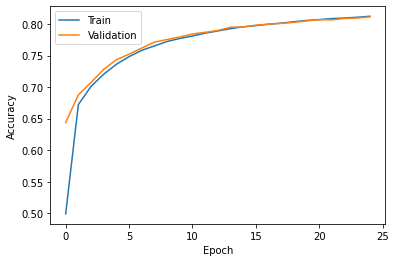

In [24]:
plt.plot(lr_rez.history['accuracy'])
plt.plot(lr_rez.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [25]:
loss_LR, accuracy_LR = lr_model.evaluate(x_test, y_test, verbose=0)
print('\nТочность на проверочных данных, используя LR: {},\nLoss на проверочных данных, используя LR: {}'.format(accuracy_LR, loss_LR))


Точность на проверочных данных, используя LR: 0.8112999796867371,
Loss на проверочных данных, используя LR: 0.5849205255508423


In [26]:
# 2.Полносвязная нейронная сеть (NN)

model_NN = tf.keras.models.Sequential()

model_NN.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model_NN.add(tf.keras.layers.Dropout(0.2))
model_NN.add(tf.keras.layers.Dense(512, activation='relu'))
model_NN.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
model_NN.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history_NN = model_NN.fit(
    x_train,
    y_train,
    batch_size=500,
    validation_data=(x_test, y_test),
    epochs=25
)

Epoch 1/25
120/120 [==============================] - 11s 95ms/step - loss: 0.5911 - accuracy: 0.7926 - val_loss: 0.3973 - val_accuracy: 0.8622
Epoch 2/25
120/120 [==============================] - 11s 90ms/step - loss: 0.3963 - accuracy: 0.8581 - val_loss: 0.3708 - val_accuracy: 0.8652
Epoch 3/25
120/120 [==============================] - 11s 89ms/step - loss: 0.3554 - accuracy: 0.8710 - val_loss: 0.3404 - val_accuracy: 0.8749
Epoch 4/25
120/120 [==============================] - 11s 91ms/step - loss: 0.3274 - accuracy: 0.8796 - val_loss: 0.3580 - val_accuracy: 0.8654
Epoch 5/25
120/120 [==============================] - 11s 93ms/step - loss: 0.3119 - accuracy: 0.8861 - val_loss: 0.3193 - val_accuracy: 0.8835
Epoch 6/25
120/120 [==============================] - 11s 88ms/step - loss: 0.2928 - accuracy: 0.8907 - val_loss: 0.3068 - val_accuracy: 0.8863
Epoch 7/25
120/120 [==============================] - 11s 92ms/step - loss: 0.2855 - accuracy: 0.8948 - val_loss: 0.3046 - val_accuracy:

In [29]:
testNN_loss, testNN_acc = model_NN.evaluate(x_test,  y_test, verbose=2)
testNN_loss, testNN_acc = round(testNN_loss,3), round(testNN_acc, 3)

print('\nТочность на проверочных данных, используя NN: {},\nLoss на проверочных данных, используя NN: {}'.format(testNN_acc, testNN_loss))

313/313 - 2s - loss: 0.2802 - accuracy: 0.9043

Точность на проверочных данных, используя NN: 0.904,
Loss на проверочных данных, используя NN: 0.28


In [30]:
# 3.1. Сверточная нейронная сеть (CNN)

CNN_X_train = np.array(x_train)
CNN_X_test = np.array(x_test)
CNN_X_train = CNN_X_train.reshape(60000, 28, 28, 1)
CNN_X_test = CNN_X_test.reshape(10000, 28, 28, 1)

In [31]:
model_CNN = tf.keras.models.Sequential()

model_CNN.add(tf.keras.layers.Convolution2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))

model_CNN.add(tf.keras.layers.MaxPooling2D(3,3))
model_CNN.add(tf.keras.layers.Convolution2D(64, kernel_size=3, activation='relu'))
model_CNN.add(tf.keras.layers.MaxPooling2D(3,3))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(64, activation='relu'))
model_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))

In [32]:
model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history_CNN = model_CNN.fit(
    CNN_X_train,
    y_train,
    batch_size=500,
    validation_data=(CNN_X_test, y_test),
    epochs=25
)

Epoch 1/25
120/120 [==============================] - 37s 307ms/step - loss: 1.0382 - accuracy: 0.6659 - val_loss: 0.5959 - val_accuracy: 0.7775
Epoch 2/25
120/120 [==============================] - 41s 344ms/step - loss: 0.5327 - accuracy: 0.8044 - val_loss: 0.4763 - val_accuracy: 0.8262
Epoch 3/25
120/120 [==============================] - 39s 329ms/step - loss: 0.4469 - accuracy: 0.8413 - val_loss: 0.4132 - val_accuracy: 0.8562
Epoch 4/25
120/120 [==============================] - 36s 303ms/step - loss: 0.4037 - accuracy: 0.8580 - val_loss: 0.3919 - val_accuracy: 0.8595
Epoch 5/25
120/120 [==============================] - 36s 299ms/step - loss: 0.3751 - accuracy: 0.8685 - val_loss: 0.3665 - val_accuracy: 0.8733
Epoch 6/25
120/120 [==============================] - 35s 290ms/step - loss: 0.3546 - accuracy: 0.8750 - val_loss: 0.3454 - val_accuracy: 0.8796
Epoch 7/25
120/120 [==============================] - 35s 291ms/step - loss: 0.3380 - accuracy: 0.8803 - val_loss: 0.3304 - val_ac

In [34]:
testСNN_loss, testСNN_acc = model_CNN.evaluate(CNN_X_test,  y_test, verbose=2)
testСNN_loss, testСNN_acc = round(testСNN_loss,3), round(testСNN_acc, 3)

print('\nТочность на проверочных данных, используя СNN: {},\nLoss на проверочных данных, используя СNN: {}'.format(testСNN_acc, testСNN_loss))

313/313 - 3s - loss: 0.2619 - accuracy: 0.9041

Точность на проверочных данных, используя СNN: 0.904,
Loss на проверочных данных, используя СNN: 0.262


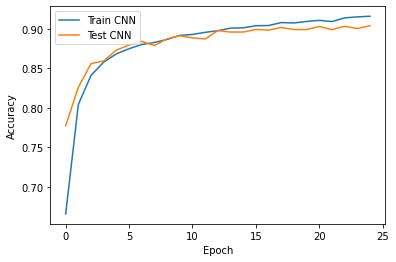

In [35]:
ax = plt.figure().gca()

plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train CNN', 'Test CNN'], loc='upper left')

In [36]:
# 3.2 Сверточная нейронная сеть с субдискретизацией и MaxPooling слоями (CNN)

model2_CNN = tf.keras.models.Sequential()

model2_CNN.add(tf.keras.layers.Convolution2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))

model2_CNN.add(tf.keras.layers.MaxPooling2D(2, 2))

model2_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model2_CNN.add(tf.keras.layers.MaxPooling2D(2, 2))

model2_CNN.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model2_CNN.add(tf.keras.layers.MaxPooling2D(2, 2))

model2_CNN.add(tf.keras.layers.Dropout(0.5))
model2_CNN.add(tf.keras.layers.Flatten())
model2_CNN.add(tf.keras.layers.Dense(512, activation='relu'))

model2_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))



In [37]:
model2_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history2_CNN = model2_CNN.fit(
    CNN_X_train,
    y_train,
    batch_size=500,
    validation_data=(CNN_X_test, y_test),
    epochs=25
)


Epoch 1/25
120/120 [==============================] - 81s 673ms/step - loss: 1.0295 - accuracy: 0.6241 - val_loss: 0.6293 - val_accuracy: 0.7771
Epoch 2/25
120/120 [==============================] - 75s 627ms/step - loss: 0.6222 - accuracy: 0.7730 - val_loss: 0.5132 - val_accuracy: 0.8118
Epoch 3/25
120/120 [==============================] - 74s 618ms/step - loss: 0.5452 - accuracy: 0.8031 - val_loss: 0.4560 - val_accuracy: 0.8301
Epoch 4/25
120/120 [==============================] - 75s 623ms/step - loss: 0.4993 - accuracy: 0.8184 - val_loss: 0.4249 - val_accuracy: 0.8388
Epoch 5/25
120/120 [==============================] - 76s 631ms/step - loss: 0.4643 - accuracy: 0.8306 - val_loss: 0.3926 - val_accuracy: 0.8532
Epoch 6/25
120/120 [==============================] - 75s 629ms/step - loss: 0.4449 - accuracy: 0.8384 - val_loss: 0.3776 - val_accuracy: 0.8592
Epoch 7/25
120/120 [==============================] - 71s 595ms/step - loss: 0.4226 - accuracy: 0.8458 - val_loss: 0.3689 - val_ac

In [39]:
test2СNN_loss, test2СNN_acc = model2_CNN.evaluate(CNN_X_test,  y_test, verbose=2)
test2СNN_loss, test2СNN_acc = round(test2СNN_loss,3), round(test2СNN_acc, 3)

print('\nТочность на проверочных данных, используя СNN: {},\nLoss на проверочных данных, используя СNN: {}'.format(test2СNN_acc, test2СNN_loss))

313/313 - 5s - loss: 0.2636 - accuracy: 0.9033

Точность на проверочных данных, используя СNN: 0.903,
Loss на проверочных данных, используя СNN: 0.264


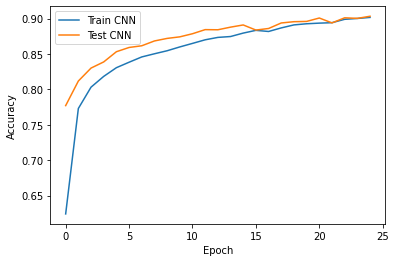

In [40]:
ax = plt.figure().gca()

plt.plot(history2_CNN.history['accuracy'])
plt.plot(history2_CNN.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train CNN', 'Test CNN'], loc='upper left')

In [ ]:
# Процесс обучения сверточной нейронной сети занимает больше времени чем обучение полносвязной нейронной сети
# и логистической регрессии. Результаты логистической регрессии намного хуже чем у нейронных сетей. При этом 
# результаты нейронных сетей друг от друга отличаются незначительно, однако CNN точнее. 